In [15]:
import sys
import statistics
import math
import aubio
import numpy as np
import matplotlib.pyplot as plt

In [16]:
filename = "../samples/columbia.wav"

In [17]:
SAMPLE_RATE = 44100
WINDOW_SIZE = 4096 # fft size
HOP_SIZE = 1024 # hop size
TOLERANCE = 0.8

In [51]:
methods = ['yinfft', 'schmitt', 'fcomb', 'mcomb']

In [52]:
pitches = {}
confidences = {}
times = {}
for method in methods:
    pitches[method] = []
    confidences[method] = []
    times[method] = []

In [53]:
for method in methods:
    s = aubio.source(filename, SAMPLE_RATE, HOP_SIZE)
    pitch_o = aubio.pitch(method, WINDOW_SIZE, HOP_SIZE, SAMPLE_RATE)
    pitch_o.set_unit("Hz")
    pitch_o.set_tolerance(TOLERANCE)
    # total number of frames read
    total_frames = 0
    while True:
        samples, read = s()
        pitch = pitch_o(samples)[0]
        #pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        #if confidence < 0.8: pitch = 0.
        #print("%f %f %f" % (total_frames / float(samplerate), pitch, confidence))
        pitches[method] += [pitch]
        confidences[method] += [confidence]
        total_frames += read
        if read < HOP_SIZE: 
            print("read %s frames with method %s" % (total_frames, method))
            break    

read 127874 frames with method yinfft
read 127874 frames with method schmitt
read 127874 frames with method fcomb
read 127874 frames with method mcomb


In [54]:
for method in methods:
    pitches[method] = np.array(pitches[method])
    confidences[method] = np.array(confidences[method])
    times[method] = [t * HOP_SIZE for t in range(len(pitches[method]))]

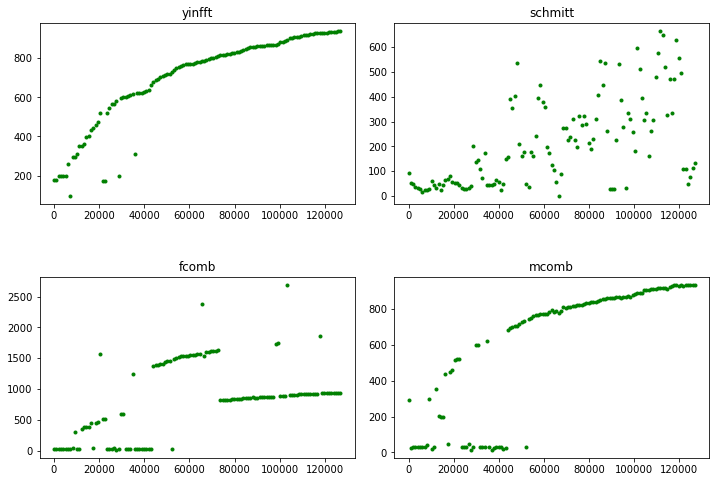

In [55]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.125)

for m,method in enumerate(methods):
    ax = fig.add_subplot(2, 2, m+1)
    ax.plot(times[method], pitches[method], '.g')
    plt.title(method)
    fig.savefig("../output/compare_algorithms.png", pad_inches=0.5, dpi=300)

In [23]:
preferred_methods = ["yinfft", "fcomb", "mcomb"]

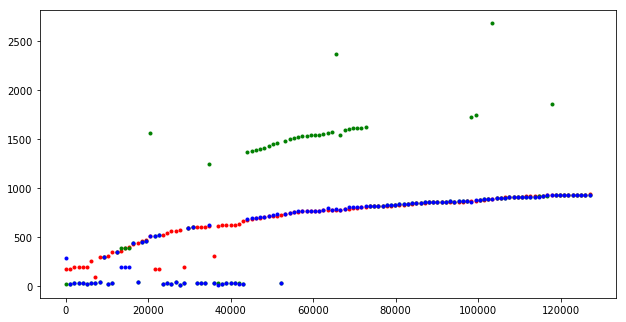

In [24]:
colors = ['red', 'green', 'blue']
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])

for m,method in enumerate(preferred_methods):
    ax.plot(times[method], pitches[method], '.g', color=colors[m])

In [29]:
medians = []
for i in range(len(pitches["mcomb"])):
    hz = [ int(pitches[method][i]) for method in preferred_methods ]
    medians += [statistics.median(hz)]

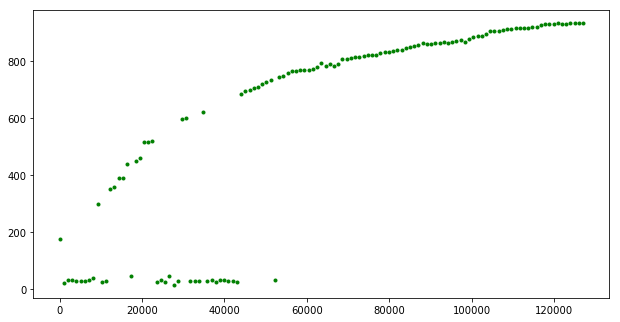

In [30]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0,0,1,1])
ax.plot(times["mcomb"], medians, '.g')